In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(os.getcwd())
from utils import *
import matplotlib.pyplot as plt
import warnings
import pickle
from collections import defaultdict
warnings.filterwarnings("ignore")

In [8]:
correct_datas = [sc.read_h5ad(f) for f in sorted(os.listdir("./")) if f.endswith("h5ad") and not f.startswith("correct")]

In [9]:
correct_datas

[AnnData object with n_obs × n_vars = 812 × 24404
     obs: 'celltype'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 1123 × 27825
     obs: 'celltype'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 1184 × 32285
     obs: 'celltype'
     obsm: 'spatial']

In [13]:
for data in correct_datas: 
    sc.pp.calculate_qc_metrics(data, inplace=True)

In [22]:
merge_data = AnnData.concatenate(*correct_datas)

In [23]:
merge_data

AnnData object with n_obs × n_vars = 3119 × 22891
    obs: 'celltype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'batch'
    var: 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2'
    obsm: 'spatial'

In [9]:
genes = ["Kctd12", "Calb2", "Cdhr1", "Doc2g", "Pcp4", "Sox11"]
types = ["olfactory nerve layer (ONL)", "glomerular layer (GL)", "mitral cell layer (MCL)", "mitral cell layer (MCL)", "granule cell layer (GCL)", "rostral migratory stream (RMS)"]

In [48]:
raw1 = sc.read_h5ad("./stereo_olfactory_bulb_ann.h5ad")
raw2 = sc.read_h5ad("./visium_olfactory_bulb_ann.h5ad")
raw3 = sc.read_h5ad("./stereo_ob_SS200000213BR_C5_bin200_ann.h5ad")

In [49]:
preprocessing(raw1)
preprocessing(raw2)
preprocessing(raw3)

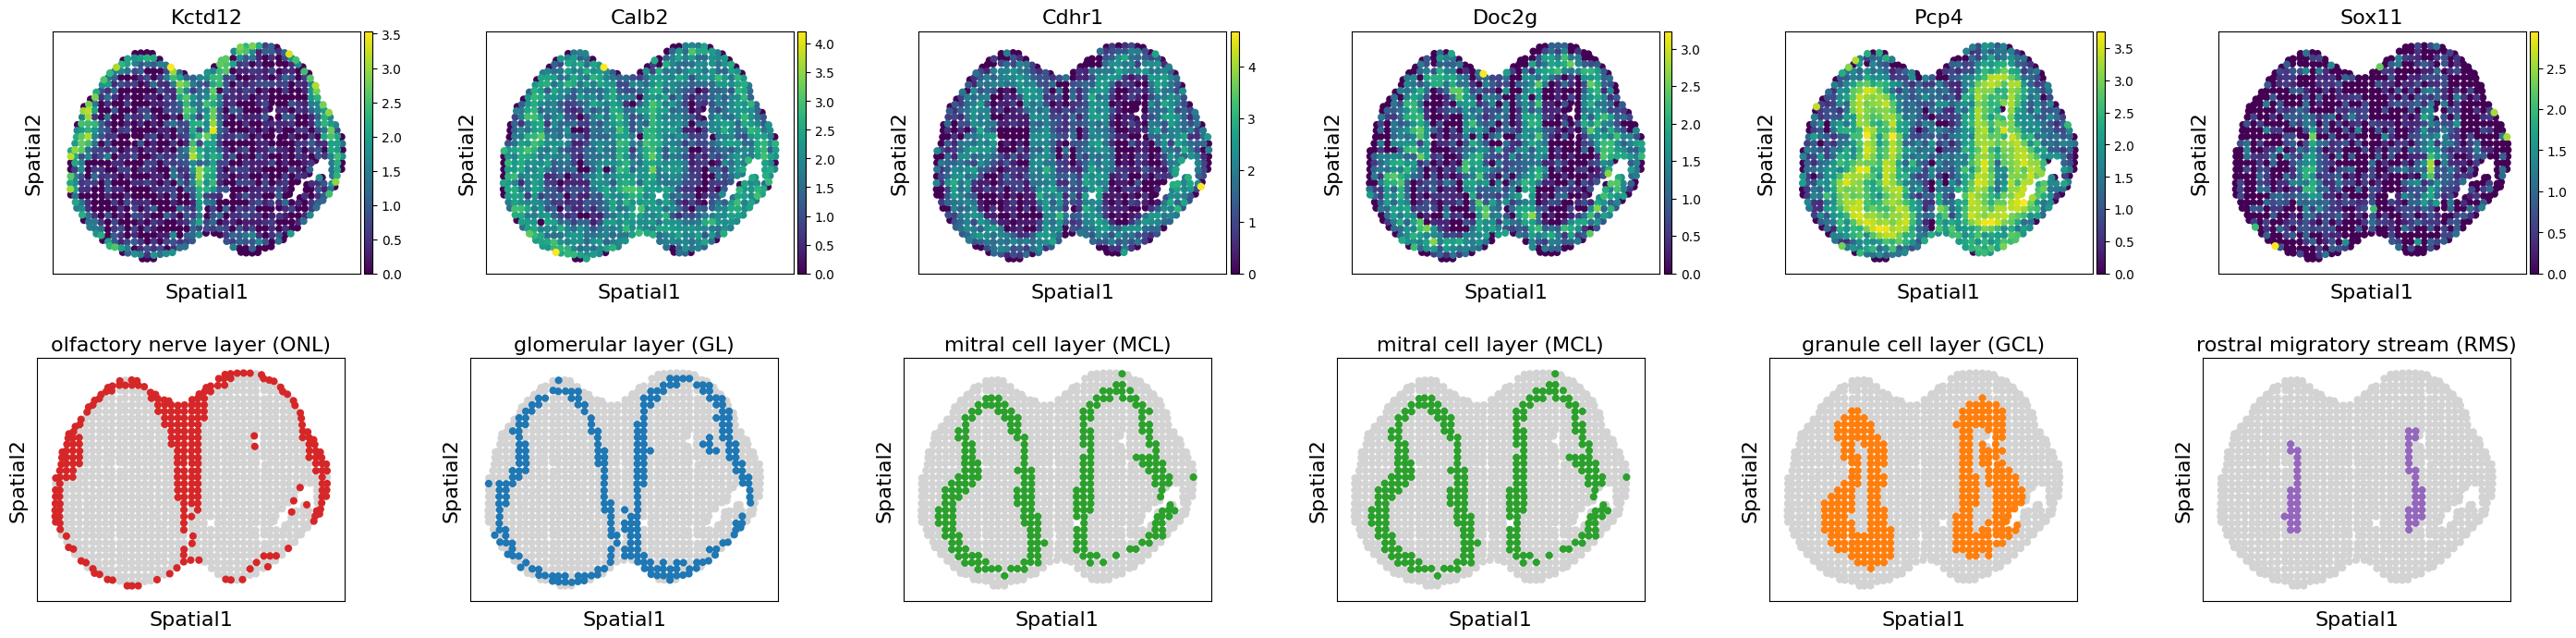

In [32]:
fig, axs = plt.subplots(2, 6, figsize=(36, 8))

for idx, gene in enumerate(genes):
    sc.pl.spatial(raw1, color=gene, spot_size=160, use_raw=False, ax=axs[0, idx], show=False)
    sc.pl.spatial(raw1, color="celltype", spot_size=160, groups=types[idx], use_raw=False, ax=axs[1, idx], show=False, legend_loc=False)
    
    axs[0, idx].set_ylabel("Spatial2", fontsize=16)
    axs[1, idx].set_ylabel("Spatial2", fontsize=16)
    
    axs[0, idx].set_xlabel("Spatial1", fontsize=16)
    axs[1, idx].set_xlabel("Spatial1", fontsize=16)
    axs[0, idx].set_title(gene, fontsize=16)
    axs[1, idx].set_title(types[idx], fontsize=16)
plt.subplots_adjust(wspace=0.05, hspace=0.35)
plt.savefig("raw1.pdf", bbox_inches="tight", dpi=150)

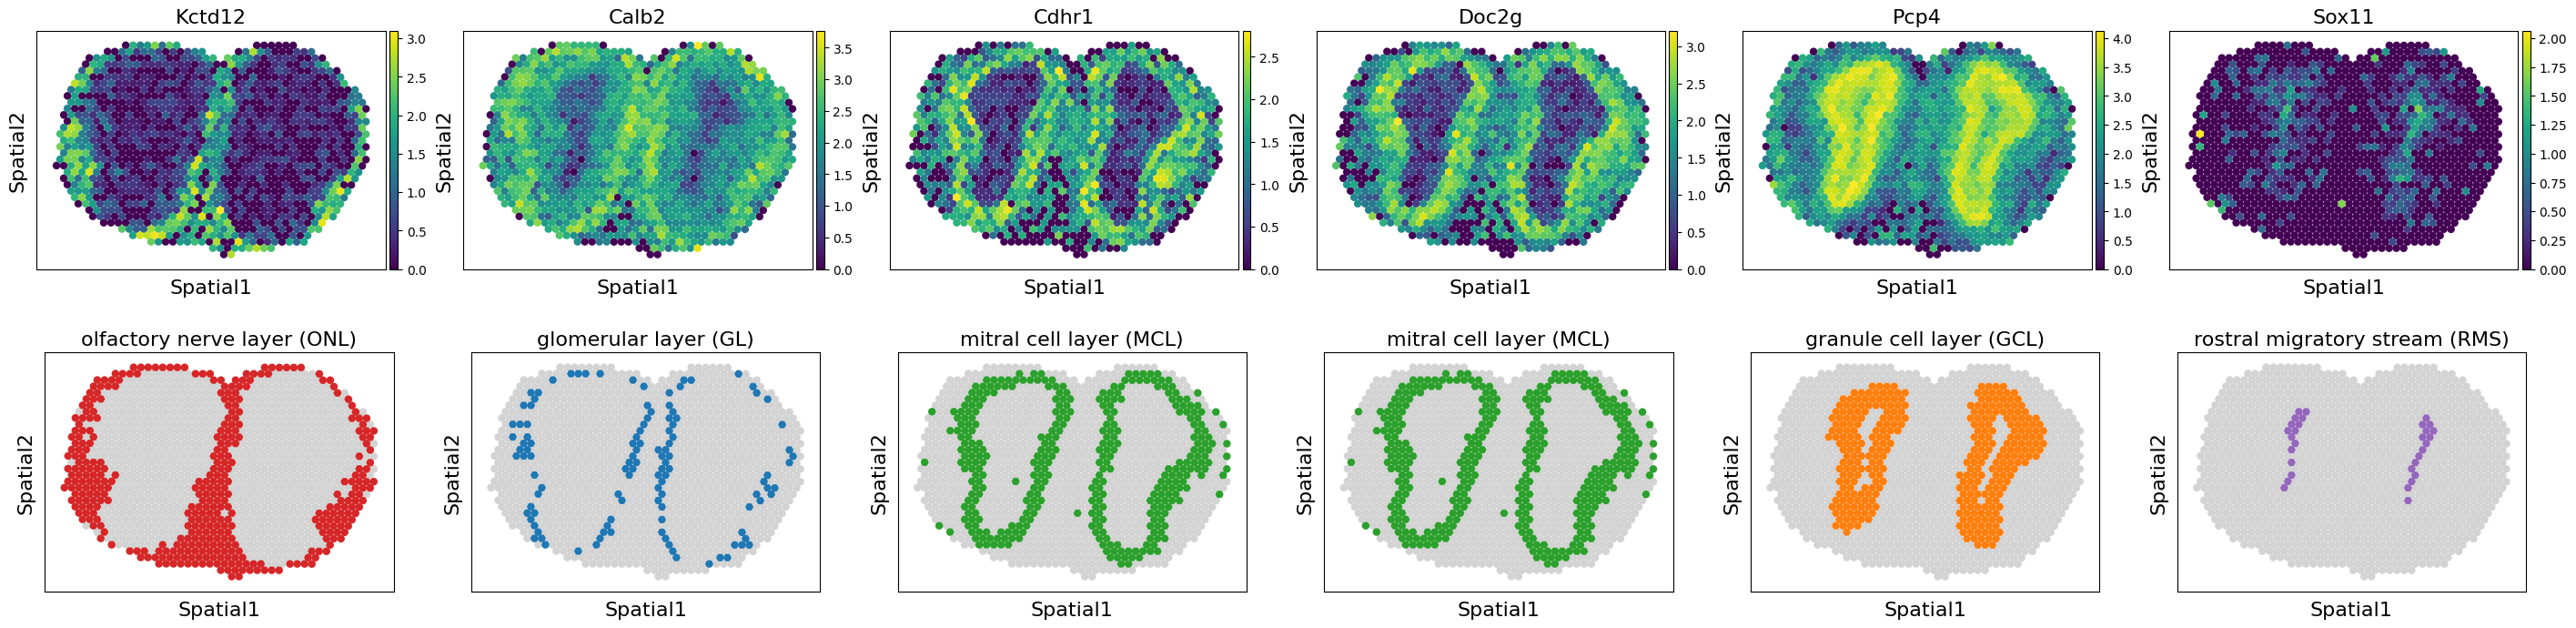

In [35]:
fig, axs = plt.subplots(2, 6, figsize=(36, 8))

for idx, gene in enumerate(genes):
    sc.pl.spatial(raw2, color=gene, spot_size=120, use_raw=False, ax=axs[0, idx], show=False)
    sc.pl.spatial(raw2, color="celltype", spot_size=120, groups=types[idx], use_raw=False, ax=axs[1, idx], show=False, legend_loc=False)
    
    axs[0, idx].set_ylabel("Spatial2", fontsize=16)
    axs[1, idx].set_ylabel("Spatial2", fontsize=16)
    
    axs[0, idx].set_xlabel("Spatial1", fontsize=16)
    axs[1, idx].set_xlabel("Spatial1", fontsize=16)
    axs[0, idx].set_title(gene, fontsize=16)
    axs[1, idx].set_title(types[idx], fontsize=16)
plt.subplots_adjust(wspace=0.05, hspace=0.35)
plt.savefig("raw2.pdf", bbox_inches="tight", dpi=150)

In [45]:
def rotation_pos(old, angle):
    t = np.radians(angle)
    cos_theta = np.cos(t)
    sin_theta = np.sin(t)
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    new = rotation_matrix@old
    return new

In [50]:
raw3.obsm["spatial"] = rotation_pos(old=raw3.obsm["spatial"].T, angle=90).T

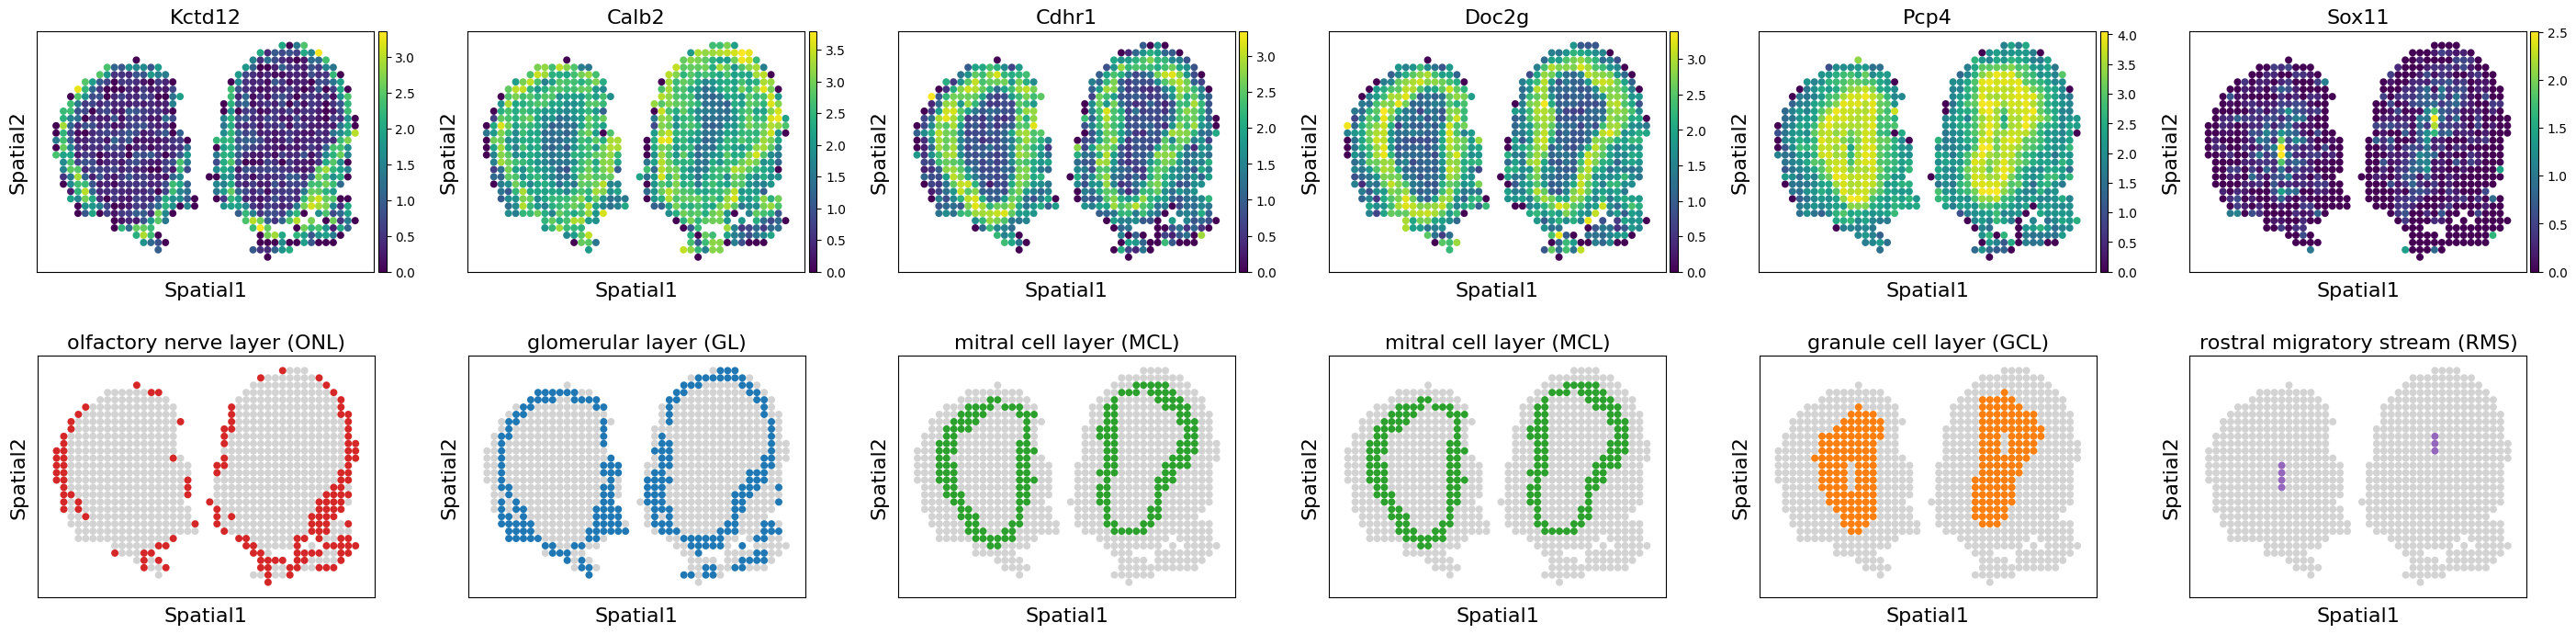

In [51]:
fig, axs = plt.subplots(2, 6, figsize=(36, 8))

for idx, gene in enumerate(genes):
    sc.pl.spatial(raw3, color=gene, spot_size=1, use_raw=False, ax=axs[0, idx], show=False)
    sc.pl.spatial(raw3, color="celltype", spot_size=1, groups=types[idx], use_raw=False, ax=axs[1, idx], show=False, legend_loc=False)
    
    axs[0, idx].set_ylabel("Spatial2", fontsize=16)
    axs[1, idx].set_ylabel("Spatial2", fontsize=16)
    
    axs[0, idx].set_xlabel("Spatial1", fontsize=16)
    axs[1, idx].set_xlabel("Spatial1", fontsize=16)
    axs[0, idx].set_title(gene, fontsize=16)
    axs[1, idx].set_title(types[idx], fontsize=16)
plt.subplots_adjust(wspace=0.05, hspace=0.35)
plt.savefig("raw3.pdf", bbox_inches="tight", dpi=150)